<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/winemag_dataset.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Unnamed:** Тут просто повторяется нумерация, так что мы потом снесем эту колонку, она нам не дает никакой информации

**country:** Страна, из которой произведено вино

**description:** Описание(запах, вкус)

**designation:**	Виноградник на территории винодельни, откуда взят виноград, из которого изготовлено вино

**points:**	Количество баллов, на которые винный энтузиаст оценил вино

**price:**	Стоимость бутылки вина

**province:**	Провинция или штат, из которого произведено вино

**region_1:**	Винодельческий район в провинции или штате (например, Напа)

**region_2:**	Иногда в пределах винодельческого района указываются более конкретные регионы (например, Резерфорд в долине Напа), но иногда это значение может быть пустым

**taster_name:** Название вина

**taster_twitter_handle:** Аккаунт в твитере

**title:** Название обзора вина, в котором часто указывается год сбора винограда, если вы заинтересованы в извлечении этой характеристики

**variety:** Сорт винограда, используемый для приготовления вина (например, Пино Нуар)

**winery:** Винодельня, на которой производилось вино

In [5]:
df = df.drop(columns = ['Unnamed: 0','description','designation','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,15.0,Douro
2,US,87,14.0,Oregon
3,US,87,13.0,Michigan
4,US,87,65.0,Oregon
...,...,...,...,...
43899,US,92,48.0,Washington
43900,Italy,92,NaN,Piedmont
43901,US,93,125.0,Oregon
43902,New Zealand,93,40.0,Central Otago


In [6]:
df.describe()

,points,price
count,43904.000000,40778.000000
mean,88.404678,35.107999
std,3.014981,39.980654
min,80.000000,3.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,2500.000000


In [7]:
df['price'] = df['price'].apply(lambda x: 'Вери дешево' if x<=10.0 else 'Норм пойло' if x>10.0 and x<35.0 else 'Вери гуд бухлишко' if x>=35.0 else x)

In [8]:
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
43899,US,92,Вери гуд бухлишко,Washington
43900,Italy,92,NaN,Piedmont
43901,US,93,Вери гуд бухлишко,Oregon
43902,New Zealand,93,Вери гуд бухлишко,Central Otago


In [9]:
df['price'] = df['price']. fillna ('Норм пойло')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43904 entries, 0 to 43903
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   43886 non-null  object
 1   points    43904 non-null  int64 
 2   price     43904 non-null  object
 3   province  43885 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [11]:
df = df.dropna()
df
#Удалям наны

,country,points,price,province
0,Italy,87,Норм пойло,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
43898,Italy,92,Вери гуд бухлишко,Piedmont
43899,US,92,Вери гуд бухлишко,Washington
43900,Italy,92,Норм пойло,Piedmont
43901,US,93,Вери гуд бухлишко,Oregon


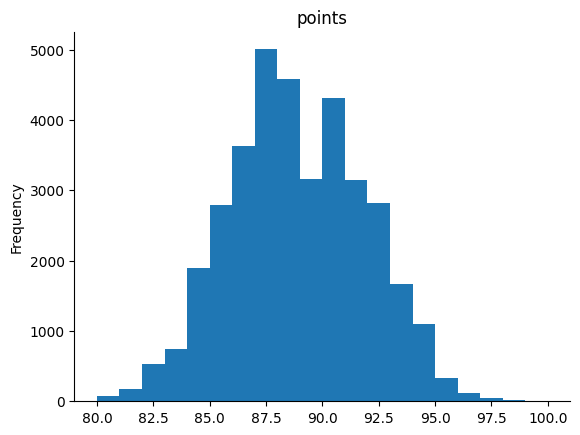

In [ ]:
# @title points

from matplotlib import pyplot as plt
df['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

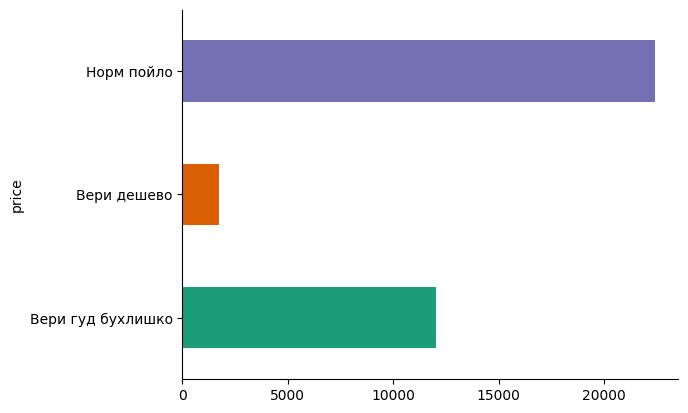

In [ ]:
# @title price

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43885 entries, 0 to 43902
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   43885 non-null  object
 1   points    43885 non-null  int64 
 2   price     43885 non-null  object
 3   province  43885 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [13]:
X=df.drop(columns=['price'])
Y = df['price']
X

,country,points,province
0,Italy,87,Sicily & Sardinia
1,Portugal,87,Douro
2,US,87,Oregon
3,US,87,Michigan
4,US,87,Oregon
...,...,...,...
43898,Italy,92,Piedmont
43899,US,92,Washington
43900,Italy,92,Piedmont
43901,US,93,Oregon


**2.**


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['points']] = scaler.fit_transform(X[['points']])
X['country'] = le.fit_transform(X['country'])
X['province'] = le.fit_transform(X['province'])
Y=le.fit_transform(Y)

In [23]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3501.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:49:00   Log-Likelihood:                -54490.
No. Observations:               43885   AIC:                         1.090e+05
Df Residuals:                   43881   BIC:                         1.090e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5563      0.016    163.221      0.000       2.526       2.587
country       -0.0097      0.000    -30.332      0.000      -0.010      -0.009
points        -2.5567      0.027    -96.393      0.000      -2.609      -2.505
province       0.0004   3.49e-05     10.490      0.000       0.000       0.000
==============================================================================
Omnibus:                    22875.641   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3469.359
Skew:                          -0.395   Prob(JB):                         0.00
Kurtosis:                       1.872   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все значимы так как p-value везде меньше 0.05

**3.**



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [29]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [30]:
X=df.drop(columns=['price'])
Y = df['price']
Y=le.fit_transform(Y)
X[['points']] = scaler.fit_transform(X[['points']])
X=pd.get_dummies (X, columns=['country','province'])

In [31]:
X

,points,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,...,province_Weinviertel,province_Wellington,province_Western Australia,province_Western Cape,province_Wiener Gemischter Satz,province_Württemberg,province_Zenata,province_Österreichischer Sekt,province_Štajerska,province_Župa
0,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43898,0.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43899,0.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43900,0.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43901,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#Делим на тест и трэин для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5.**

In [35]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [37]:
#Точность
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.729378702719125, 0.7296825155704086, 0.7219352878626766)

In [38]:
#Выводим сразу отчет классификации, чтобы сравнить рекол и зкуцишион
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      4446
           1       0.59      0.10      0.18       633
           2       0.74      0.86      0.80      8087

    accuracy                           0.73     13166
   macro avg       0.68      0.52      0.54     13166
weighted avg       0.72      0.73      0.71     13166



In [39]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64      4446
           1       0.56      0.15      0.23       633
           2       0.74      0.86      0.80      8087

    accuracy                           0.73     13166
   macro avg       0.67      0.53      0.55     13166
weighted avg       0.72      0.73      0.71     13166



In [40]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      4446
           1       0.53      0.17      0.25       633
           2       0.75      0.82      0.78      8087

    accuracy                           0.72     13166
   macro avg       0.65      0.54      0.56     13166
weighted avg       0.71      0.72      0.71     13166



Логистическая модель лучшая

**6.**

In [41]:
cf_matrix = confusion_matrix(y_test,y_pred_lr)

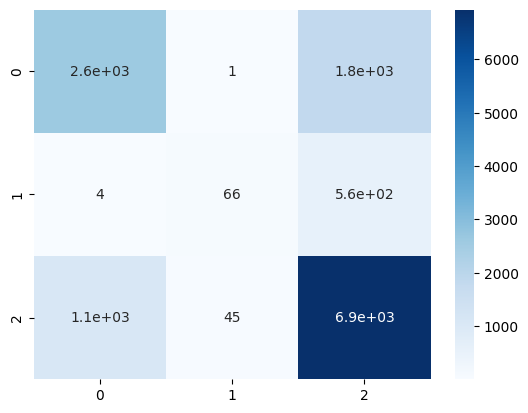

In [42]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [43]:
cf_matrix

array([[2605,    1, 1840],
       [   4,   66,  563],
       [1110,   45, 6932]])

**7.**

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier(max_depth = 5)
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

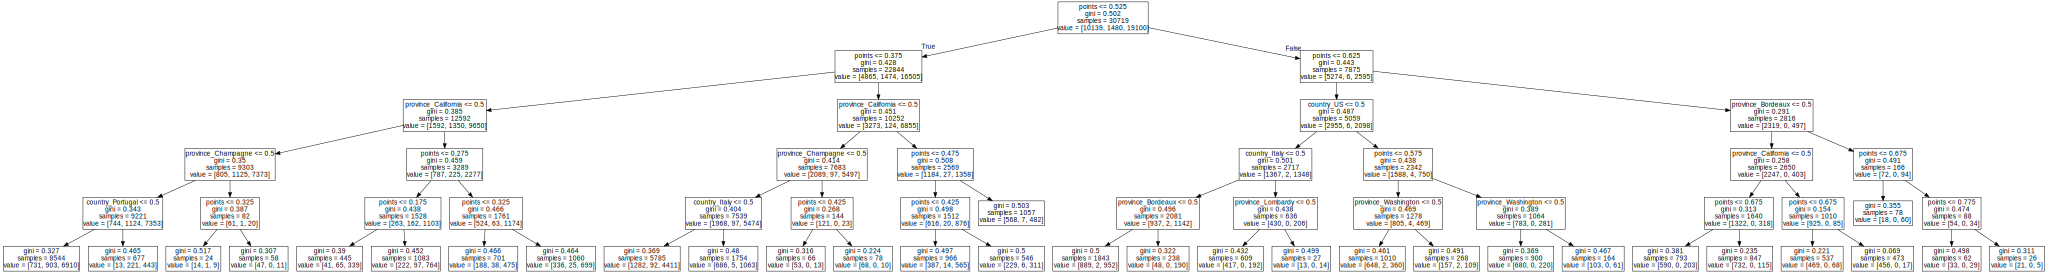

In [45]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

Если поинт больше чем 0.525 то идет вправо, если между 0.525 и 0.575 то вниз

**Доп баллы**

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

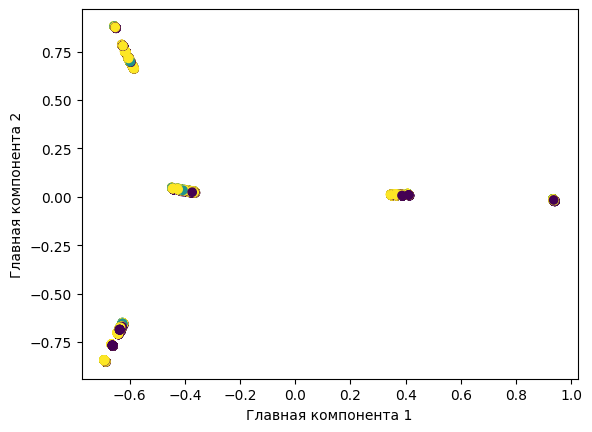

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

**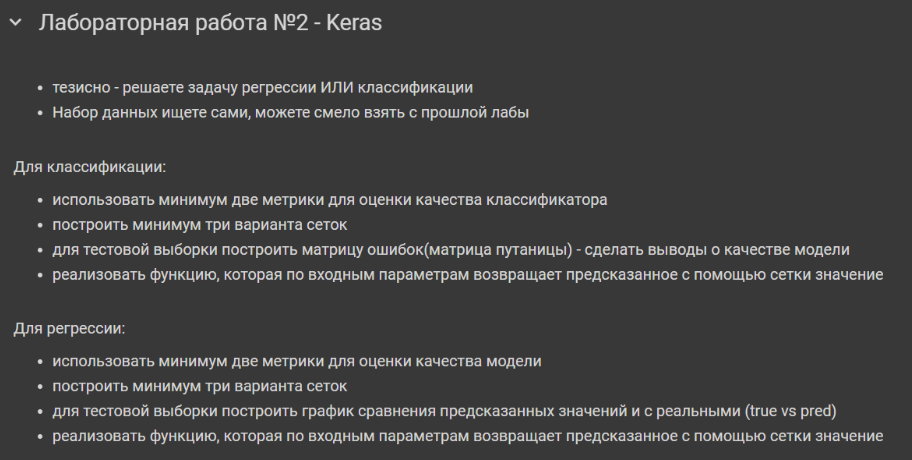**

In [48]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [49]:
y = to_categorical(Y)

In [50]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [51]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model.fit(X_train, y_train, epochs =5,batch_size=5)

Epoch 1/5
5618/5618 [==============================] - 30s 5ms/step - loss: 0.6400 - accuracy: 0.7137 - f1_score: 0.4891
Epoch 2/5
5618/5618 [==============================] - 16s 3ms/step - loss: 0.6101 - accuracy: 0.7290 - f1_score: 0.5260
Epoch 3/5
5618/5618 [==============================] - 16s 3ms/step - loss: 0.6016 - accuracy: 0.7305 - f1_score: 0.5371
Epoch 4/5
5618/5618 [==============================] - 15s 3ms/step - loss: 0.5969 - accuracy: 0.7336 - f1_score: 0.5439
Epoch 5/5
5618/5618 [==============================] - 17s 3ms/step - loss: 0.5938 - accuracy: 0.7341 - f1_score: 0.5501


In [52]:
model1 = keras.models.Sequential()
model1.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(y.shape[1], activation='softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model1.fit(X_train, y_train, epochs =20,batch_size=32)

Epoch 1/20
878/878 [==============================] - 5s 5ms/step - loss: 0.6515 - accuracy: 0.7071 - f1_score: 0.4769
Epoch 2/20
878/878 [==============================] - 2s 2ms/step - loss: 0.6008 - accuracy: 0.7309 - f1_score: 0.5448
Epoch 3/20
878/878 [==============================] - 2s 3ms/step - loss: 0.5942 - accuracy: 0.7328 - f1_score: 0.5577
Epoch 4/20
878/878 [==============================] - 2s 2ms/step - loss: 0.5917 - accuracy: 0.7344 - f1_score: 0.5576
Epoch 5/20
878/878 [==============================] - 3s 3ms/step - loss: 0.5884 - accuracy: 0.7373 - f1_score: 0.5618
Epoch 6/20
878/878 [==============================] - 2s 2ms/step - loss: 0.5877 - accuracy: 0.7379 - f1_score: 0.5617
Epoch 7/20
878/878 [==============================] - 2s 2ms/step - loss: 0.5860 - accuracy: 0.7373 - f1_score: 0.5656
Epoch 8/20
878/878 [==============================] - 2s 2ms/step - loss: 0.5852 - accuracy: 0.7371 - f1_score: 0.5667
Epoch 9/20
878/878 [============================

In [53]:
model2 = keras.models.Sequential()
model2.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(y.shape[1], activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model2.fit(X_train, y_train, epochs =10,batch_size=8)

Epoch 1/10
3511/3511 [==============================] - 13s 3ms/step - loss: 0.6403 - accuracy: 0.7091 - f1_score: 0.4870
Epoch 2/10
3511/3511 [==============================] - 10s 3ms/step - loss: 0.6088 - accuracy: 0.7277 - f1_score: 0.5243
Epoch 3/10
3511/3511 [==============================] - 10s 3ms/step - loss: 0.6037 - accuracy: 0.7284 - f1_score: 0.5297
Epoch 4/10
3511/3511 [==============================] - 10s 3ms/step - loss: 0.5995 - accuracy: 0.7321 - f1_score: 0.5451
Epoch 5/10
3511/3511 [==============================] - 11s 3ms/step - loss: 0.5966 - accuracy: 0.7322 - f1_score: 0.5411
Epoch 6/10
3511/3511 [==============================] - 11s 3ms/step - loss: 0.5937 - accuracy: 0.7333 - f1_score: 0.5461
Epoch 7/10
3511/3511 [==============================] - 10s 3ms/step - loss: 0.5923 - accuracy: 0.7355 - f1_score: 0.5513
Epoch 8/10
3511/3511 [==============================] - 19s 5ms/step - loss: 0.5916 - accuracy: 0.7355 - f1_score: 0.5485
Epoch 9/10
3511/3511 [==

Все примерно одинаковы

In [54]:
y_pred = model.predict(X_test)
y_classes = y_pred.argmax(axis=-1)
y_classes[:10]

275/275 [==============================] - 0s 1ms/step


array([0, 2, 2, 2, 2, 1, 2, 0, 0, 2])

In [55]:
le.inverse_transform(y_classes[:10])

array(['Вери гуд бухлишко', 'Норм пойло', 'Норм пойло', 'Норм пойло',
       'Норм пойло', 'Вери дешево', 'Норм пойло', 'Вери гуд бухлишко',
       'Вери гуд бухлишко', 'Норм пойло'], dtype=object)

In [56]:
y_test_old=y_test.argmax(axis=-1)

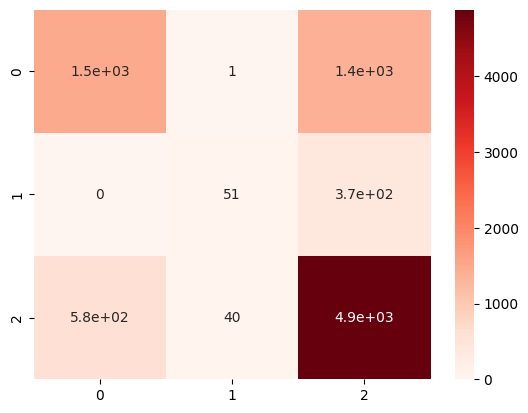

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test_old, y_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

In [62]:
cf_matrix

array([[1474,    1, 1379],
       [   0,   51,  372],
       [ 580,   40, 4880]])

In [76]:
import pickle
with open('lable_encoder.pkl', 'wb') as fp:
    pickle.dump(le,fp)
with open('scaler.pkl', 'wb') as fp:
    pickle.dump(scaler,fp)
with open('model.pkl','wb') as fp:
    pickle.dump(model,fp)

In [77]:
import copy

def predict_data(dat):
    x=copy.deepcopy(dat)
    with open('lable_encoder.pkl', 'rb') as fp:
        le = pickle.load(fp)
    with open('scaler.pkl', 'rb') as fp:
        scaler = pickle.load(fp)
    with open('model.pkl','rb') as fp:
        model = pickle.load(fp)
    x.budget.fillna(x.budget.median(),inplace=True)
    x.revenue.fillna(x.revenue.median(),inplace=True)
    x.runtime.fillna(x.runtime.median(),inplace=True)
    x.genre1.fillna(x.genre1.mode(),inplace=True)
    x[['points']] = scaler.fit_transform(x[['points']])
    x['price'] = x['price']. fillna ('Норм пойло')
    x=pd.get_dummies (x, columns=['price'])
    y_pred = model.predict(x)
    y_classes = y_pred.argmax(axis=-1)
    return le.inverse_transform(y_classes)

In [78]:
y_answer = predict_data(df[['price','points']])

AttributeError: 'DataFrame' object has no attribute 'budget'